In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
import os
from pathlib import Path
dir = os.path.realpath('..')
# `cwd`: current directory is straightforward
# cwd = Path.cwd()
fname = os.path.join(dir, 'calibration_data/StepsTest_2022-01-13_202350.csv')

In [23]:
fname

'/Users/jdrockton/OneDrive/Documents/Spring 2022/Quadlab_team4/calibration_data/StepsTest_2022-01-13_202350.csv'

In [24]:
df = pd.read_csv(fname)

•	RPM vs. PWM curve
•	Thrust vs. PWM curve
•	Efficiency vs. RPM
•	Thrust vs. RPM
•	Torque vs. RPM

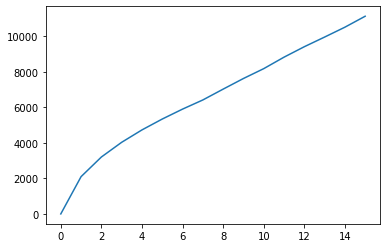

In [25]:
plt.plot(df['Motor Optical Speed (RPM)'])

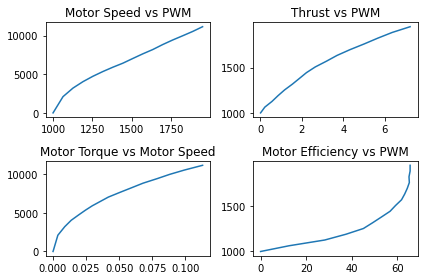

In [26]:
plt.subplot(2,2,1)
plt.plot(df['ESC signal (µs)'],df['Motor Optical Speed (RPM)'])
plt.title('Motor Speed vs PWM')
plt.subplot(2,2,2)
plt.plot(df['Thrust (N)'],df['ESC signal (µs)'])
plt.title('Thrust vs PWM')
plt.subplot(2,2,3)
plt.plot(df['Torque (N·m)'],df['Motor Optical Speed (RPM)'])
plt.title('Motor Torque vs Motor Speed')

plt.subplot(2,2,4)
plt.plot(df['Motor Efficiency (%)'],df['ESC signal (µs)'])
plt.title('Motor Efficiency vs PWM')

plt.tight_layout()

In [27]:
df.columns

Index(['Time (s)', 'ESC signal (µs)', 'Servo 1 (µs)', 'Servo 2 (µs)',
       'Servo 3 (µs)', 'AccX (g)', 'AccY (g)', 'AccZ (g)', 'Torque (N·m)',
       'Thrust (N)', 'Voltage (V)', 'Current (A)',
       'Motor Electrical Speed (RPM)', 'Motor Optical Speed (RPM)',
       'Electrical Power (W)', 'Mechanical Power (W)', 'Motor Efficiency (%)',
       'Propeller Mech. Efficiency (N/W)', 'Overall Efficiency (N/W)',
       'Vibration (g)', 'App message', 'Unnamed: 21'],
      dtype='object')

<AxesSubplot:>

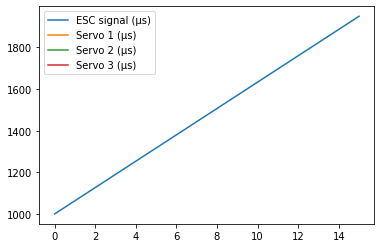

In [28]:
df[['ESC signal (µs)', 'Servo 1 (µs)', 'Servo 2 (µs)',
       'Servo 3 (µs)']].plot()

In [29]:
 df['Servo 3 (µs)']

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
Name: Servo 3 (µs), dtype: float64